<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/RandomForestExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

O objetivo desse estudo é mostrar como ferramentas de machine learning podem melhorar a assertividade das estratégias de investimento.
Suponhamos que uma simples estratégia usando cruzamento de médias móveis acerta 50% das vezes. No entanto, sabemos que variáveis exógenas ao modelo afetam seu resultado, como por exemplo o nível da taxa de juros, volatilidade, retorno do petróleo, etc. Ferramentas de Machine Learning podem nos ajudar a encontrar a probabilidade condicional de nossa estratégia dar certo de acordo com essas variáveis exógenas. Por exemplo, enquanto a probabilidade incondicional do nosso modelo fictício é de 50%, podemos descobrir que ele acerta 60% das vezes quando o PIB está em trajetória crescente, mas acerta apenas 40% das vezes se a taxa de câmbio tiver subido nos últimos 10 dias. Algoritmos de Random Forest podem nos auxiliar nessa tarefa de identificar quais são os momentos propícios para executar a estratégia.


Gerei um arquivo CSV com 5 atributos fictícios, 50 operações e classifiquei o retorno da estrategia como 1, se o resultado foi positivo, e 0, caso negativo.

In [2]:
url="https://raw.githubusercontent.com/BernardoRMendes/Projeto/main/RandomForestExemplo.csv"

In [3]:
df=pd.read_csv(url,index_col=0,sep=";")

In [4]:
df.head()

,Atributo 1,Atributo 2,Atributo 3,Atributo 4,Atributo 5,Retorno
ID,,,,,,
1,"0,015646235",1,"20,85","0,00625","0,0117",1
2,"0,001852498",0,"20,89","0,015873016","0,0333",1
3,"-0,020495125",0,"21,03","-0,003148784","-0,007",0
4,"0,006930826",0,"21,1","0,008601979","0,003",1
5,"-0,010846745",0,"20,92","0,013912576","-0,0109",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Atributo 1  50 non-null     object
 1   Atributo 2  50 non-null     int64 
 2   Atributo 3  50 non-null     object
 3   Atributo 4  50 non-null     object
 4   Atributo 5  50 non-null     object
 5   Retorno     50 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.7+ KB


In [6]:
df['Atributo 1']=df['Atributo 1'].str.replace(",",".")
df['Atributo 3']=df['Atributo 3'].str.replace(",",".")
df['Atributo 4']=df['Atributo 4'].str.replace(",",".")
df['Atributo 5']=df['Atributo 5'].str.replace(",",".")

In [7]:
df['Atributo 1']=df['Atributo 1'].astype(float)
df['Atributo 2']=df['Atributo 2'].astype(float)
df['Atributo 3']=df['Atributo 3'].astype(float)
df['Atributo 4']=df['Atributo 4'].astype(float)
df['Atributo 5']=df['Atributo 5'].astype(float)
df["Retorno"]=df["Retorno"].astype(float)

Em modelos de Machine Learning, é comum o uso de métodos de seleção de atributos antes de fazer a classificação. Porém, estamos interessados não só na interação de um atributo com o target, como também na interação entre os próprios atributos. Por isso, devemos tomar cuidado com métodos que somente aplicam testes estatísticos separadamente para cada variável preditora.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Atributo 1  50 non-null     float64
 1   Atributo 2  50 non-null     float64
 2   Atributo 3  50 non-null     float64
 3   Atributo 4  50 non-null     float64
 4   Atributo 5  50 non-null     float64
 5   Retorno     50 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [9]:
df.head()

,Atributo 1,Atributo 2,Atributo 3,Atributo 4,Atributo 5,Retorno
ID,,,,,,
1,0.015646,1.0,20.85,0.006250,0.0117,1.0
2,0.001852,0.0,20.89,0.015873,0.0333,1.0
3,-0.020495,0.0,21.03,-0.003149,-0.0070,0.0
4,0.006931,0.0,21.10,0.008602,0.0030,1.0
5,-0.010847,0.0,20.92,0.013913,-0.0109,0.0


In [10]:
df.describe()

,Atributo 1,Atributo 2,Atributo 3,Atributo 4,Atributo 5,Retorno
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.000644,0.500000,19.641800,0.000145,0.006380,0.540000
std,0.010543,0.505076,0.752074,0.013781,0.022749,0.503457
min,-0.032338,0.000000,18.370000,-0.035222,-0.029100,0.000000
25%,-0.004443,0.000000,19.152500,-0.007296,-0.013900,0.000000
50%,0.002585,0.500000,19.480000,0.000769,0.003000,1.000000
75%,0.007057,1.000000,20.030000,0.009339,0.023700,1.000000
max,0.019490,1.000000,21.210000,0.031646,0.046800,1.000000


In [11]:
df.corr()

,Atributo 1,Atributo 2,Atributo 3,Atributo 4,Atributo 5,Retorno
Atributo 1,1.000000,0.068722,-0.090445,-0.055638,0.150964,0.168042
Atributo 2,0.068722,1.000000,-0.495087,0.057094,0.006394,0.280900
Atributo 3,-0.090445,-0.495087,1.000000,0.066168,0.196608,0.065832
Atributo 4,-0.055638,0.057094,0.066168,1.000000,0.192887,-0.012568
Atributo 5,0.150964,0.006394,0.196608,0.192887,1.000000,0.137098
Retorno,0.168042,0.280900,0.065832,-0.012568,0.137098,1.000000


In [12]:
atributos=df[["Atributo 1","Atributo 2","Atributo 3","Atributo 4","Atributo 5"]]
target=df["Retorno"]

In [13]:
atributosTrain, atributosTest, targetTrain, targetTest = train_test_split(atributos,target, test_size = .3)

In [14]:
target[target==1].count()/target.shape[0]

0.54

Veja que, nesse exemplo, a probabilidade incondicional do modelo é de 54%.

In [15]:
clf=RandomForestClassifier(random_state=44)

In [16]:
print(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)


In [17]:
modelo1=clf.fit(atributosTrain, targetTrain)

In [18]:
previsao=modelo1.predict(atributosTrain)

In [19]:
acuracia=sklearn.metrics.accuracy_score(targetTrain,previsao)

In [20]:
acuracia

1.0

In [21]:
importancia=clf.feature_importances_
indices = np.argsort(importancia)
ind=[]
for i in indices:
    ind.append(atributosTrain.columns[i])

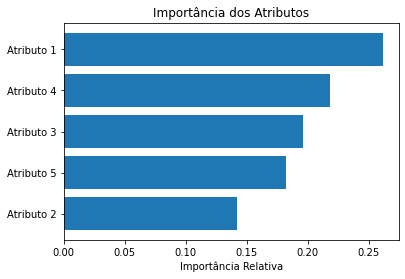

In [22]:
plt.figure()
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importancia[indices])
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

Podemos ver que o modelo sofre de overfitting, pois aprendeu demais no conjunto de treino. Para que isso não ocorra, devemos trabalhar os hiperparâmetros do modelo. Em estudos mais complexos, com muitas variáveis, podemos utilizar o GridSearch para encontrar uma boa combinação de hiperparâmetros. Assim que o modelo em treino atingir uma performance satisfatória, faremos uso do Dataset de teste.

In [23]:
clf2=RandomForestClassifier(max_depth=3,n_estimators=3,random_state=70)

In [24]:
modelo2=clf2.fit(atributosTrain, targetTrain)

In [25]:
previsao2=modelo2.predict(atributosTrain)

In [26]:
acuracia=sklearn.metrics.accuracy_score(targetTrain,previsao2)

In [27]:
acuracia

0.8571428571428571

Observe que alterando apenas alguns parâmetros manualmente já conseguimos reduzir o overfitting.

In [28]:
importancia=clf2.feature_importances_
indices = np.argsort(importancia)
ind=[]
for i in indices:
    ind.append(atributosTrain.columns[i])

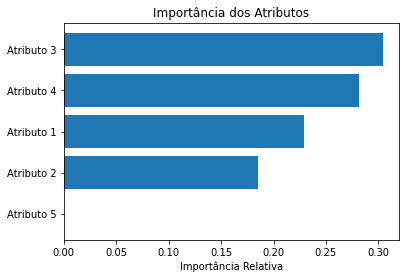

In [29]:
plt.figure()
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importancia[indices])
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

Assim que atingirmos um modelo satisfatório em treinamento, devemos partir para a fase de teste.

In [30]:
teste=clf2.predict(atributosTest)

In [31]:
acuracia=sklearn.metrics.accuracy_score(targetTest,teste)

In [32]:
acuracia

0.4666666666666667

Nessa etapa devemos comparar a acurácia em teste com a acurácia do modelo em treinamento. Caso a acurácia em teste fosse muito menor do que a acurácia em treino, isso indica que o modelo sofre de overfitting (aprendeu demais no conjunto de treino) e foi incapaz de generalizar para novos dados. Em nosso modelo, isso já é esperado, uma vez que não há o que aprender (os atributos foram construídos de forma totalmente aleatória). Qualquer acurácia acima de 54% (valor obtido para acurácia caso o modelo sempre previsse a classe com maior número de exemplos) já seria um indicativo de overfitting.



Também podemos usar o resultado de nosso modelo para calibrar o tamanho da posição em cada operação. Vejamos um exemplo:

In [33]:
#Lista de inputs
lista=[0.008931,1.0,31.10,0.078602,0.0040]
x= np.asarray(lista)

In [34]:
clf2.predict(x.reshape(1,-1))

array([0.])

In [35]:
clf2.predict_proba(x.reshape(1,-1))

array([[0.5, 0.5]])

In [36]:
#Lista de inputs
lista2=[0.004931,0.0,21.10,0.078602,0.0040]
x2=np.asarray(lista2)

In [37]:
clf2.predict(x2.reshape(1,-1))

array([1.])

In [38]:
clf2.predict_proba(x2.reshape(1,-1))

array([[0.0952381, 0.9047619]])

Agora podemos calcular a probabilidade prevista para cada classe. Suponha que na primeira operação tenhamos resultado positivo com probabilidade condicional de 80%, enquanto na segunda operação tenhamos resultado positivo com probabilidade condicional de 60%. Apesar de as duas operações terem resultado positivo, é possível calibrar o tamanho da posição de acordo com a probabilidade prevista.